<a href="https://colab.research.google.com/github/geethamGT3RS/moisture_minds/blob/main/soil_moisture_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MOISTURE MINDS** 
to predict data of next month using data of previous eight months. Code and its description below run this notebook in google colab or jupyter


parameters given


ttime - timestamp in yyyy-mm-dd format

pm - particulate matter (1,2,3 is categorised into different sizes)

am - atmospheric moisture

sm - soil moisture

st - soil temperature

lum - luminosity

temp - temperature

humd - humidity

pres - pressure

In [119]:
import pickle

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

# **GETTING BOTH DATA-SETS**
we need to set index as time for our data for simplicity

In [121]:
url = 'https://raw.githubusercontent.com/chidaksh/CosmosocClub/master/Parsec2023/user1_data.csv'
df1 = pd.read_csv(url,index_col= 0)

In [122]:
url = 'https://raw.githubusercontent.com/chidaksh/CosmosocClub/master/Parsec2023/user2_data.csv'
df2 = pd.read_csv(url, index_col = 0)

In [123]:
df1.index = pd.to_datetime(df1.index, format ='%Y-%m-%d %H:%M:%S')
df2.index = pd.to_datetime(df2.index, format ='%Y-%m-%d %H:%M:%S')

In [124]:
df1.describe()

,pm1,pm2,pm3,am,sm,st,lum
count,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000
mean,1.610847,2.633942,60.393699,2.015076,4288.940593,26.852714,2714.784292
std,1.058214,1.293359,28.344044,2.280934,2901.962556,1.163759,4231.353590
min,0.550000,0.000000,0.000000,0.000000,286.000000,24.040000,0.000000
25%,0.550000,1.670000,38.550000,0.000000,541.000000,26.110000,1.000000
50%,1.110000,2.230000,51.400000,1.600000,6173.000000,26.700000,6.000000
75%,2.230000,3.350000,77.110000,3.200000,6667.000000,27.390000,4675.000000
max,6.700000,6.700000,153.660000,18.390000,7937.000000,31.170000,19288.000000


# **MAKING DATA SET READY FOR TRAINING**
**SINCE WE HAVE MANY SAMPLES PER DAY AND ARE AT IRREGULAR TIME INTERVALS IT IS BETTER TO TAKE AVERAGE OF EVERY VALUE PER DAY WHICH REDUCES OUR HUGE DATA SET TO SIZE OF 235 SAMPLES. SO THAT WE CALUCLATE SOIL MOISTURE FOR MARCH.**

using resample function to get average soil moisture per day

In [125]:
df1_avg = df1.resample("d").mean()
df2_avg = df2.resample("d").mean()

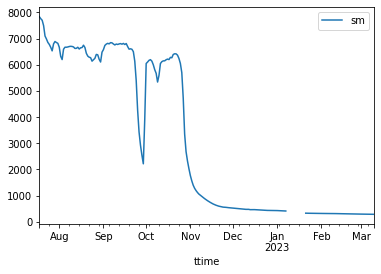

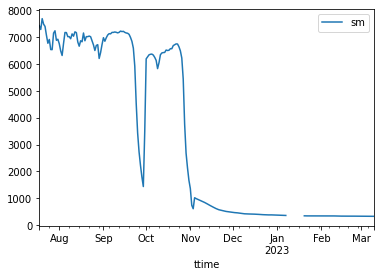

In [126]:
df1_avg.plot(y='sm',kind='line')
plt.show()
df2_avg.plot(y='sm',kind='line')
plt.show()

**Here we see that some data is missing in january** 

In [127]:
df1_avg[170:190]

,pm1,pm2,pm3,am,sm,st,lum
ttime,,,,,,,
2023-01-04,1.013448,1.447931,33.520000,1.131034,424.448276,26.791034,2257.706897
2023-01-05,1.003793,1.418966,33.520000,1.558621,422.068966,26.387586,2162.793103
2023-01-06,1.044667,1.390000,33.492000,1.920000,418.950000,26.188500,2238.133333
2023-01-07,1.012609,1.450870,33.520000,1.460870,415.086957,26.085652,1798.608696
2023-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Let's fill unknown values with mean of nearest no NaN values. Fill with average of parameters on 7 and 21 january same goes for second data set**

In [128]:
df1_avg["pm1"].fillna(1,inplace = True)
df1_avg["pm2"].fillna(1.38,inplace=True)
df1_avg["pm3"].fillna(32.4,inplace=True)
df1_avg["am"].fillna(1.23,inplace=True)
df1_avg["sm"].fillna(370,inplace=True)
df1_avg["st"].fillna(26.2,inplace=True)
df1_avg["lum"].fillna(2000,inplace=True)

In [129]:
df1_avg[170:190]

,pm1,pm2,pm3,am,sm,st,lum
ttime,,,,,,,
2023-01-04,1.013448,1.447931,33.520000,1.131034,424.448276,26.791034,2257.706897
2023-01-05,1.003793,1.418966,33.520000,1.558621,422.068966,26.387586,2162.793103
2023-01-06,1.044667,1.390000,33.492000,1.920000,418.950000,26.188500,2238.133333
2023-01-07,1.012609,1.450870,33.520000,1.460870,415.086957,26.085652,1798.608696
2023-01-08,1.000000,1.380000,32.400000,1.230000,370.000000,26.200000,2000.000000
2023-01-09,1.000000,1.380000,32.400000,1.230000,370.000000,26.200000,2000.000000
2023-01-10,1.000000,1.380000,32.400000,1.230000,370.000000,26.200000,2000.000000
2023-01-11,1.000000,1.380000,32.400000,1.230000,370.000000,26.200000,2000.000000
2023-01-12,1.000000,1.380000,32.400000,1.230000,370.000000,26.200000,2000.000000


In [130]:
df2_avg[170:190]

,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
ttime,,,,,,,,,
2023-01-04,1.030000,1.403333,33.520000,0.749206,365.555556,2996.936508,21.198254,63.843651,93550.343810
2023-01-05,1.012222,1.421111,33.520000,1.828571,362.809524,2574.396825,20.471429,61.808730,93608.142540
2023-01-06,1.037742,1.408065,33.520000,1.806452,360.435484,3165.580645,20.038387,71.187742,93747.303871
2023-01-07,1.040000,1.460000,33.520000,1.500000,359.083333,789.708333,15.612500,97.820417,93719.631667
2023-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df2_avg["pm1"].fillna(1,inplace = True)
df2_avg["pm2"].fillna(1.38,inplace=True)
df2_avg["pm3"].fillna(32.4,inplace=True)
df2_avg["am"].fillna(1.83,inplace=True)
df2_avg["sm"].fillna(350,inplace=True)
df2_avg["lum"].fillna(2000,inplace=True)
df2_avg["temp"].fillna(20,inplace=True)
df2_avg["humd"].fillna(90,inplace=True)
df2_avg["pres"].fillna(93500,inplace=True)

In [132]:
df2_avg[170:190]

,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
ttime,,,,,,,,,
2023-01-04,1.030000,1.403333,33.520000,0.749206,365.555556,2996.936508,21.198254,63.843651,93550.343810
2023-01-05,1.012222,1.421111,33.520000,1.828571,362.809524,2574.396825,20.471429,61.808730,93608.142540
2023-01-06,1.037742,1.408065,33.520000,1.806452,360.435484,3165.580645,20.038387,71.187742,93747.303871
2023-01-07,1.040000,1.460000,33.520000,1.500000,359.083333,789.708333,15.612500,97.820417,93719.631667
2023-01-08,1.000000,1.380000,32.400000,1.830000,350.000000,2000.000000,20.000000,90.000000,93500.000000
2023-01-09,1.000000,1.380000,32.400000,1.830000,350.000000,2000.000000,20.000000,90.000000,93500.000000
2023-01-10,1.000000,1.380000,32.400000,1.830000,350.000000,2000.000000,20.000000,90.000000,93500.000000
2023-01-11,1.000000,1.380000,32.400000,1.830000,350.000000,2000.000000,20.000000,90.000000,93500.000000
2023-01-12,1.000000,1.380000,32.400000,1.830000,350.000000,2000.000000,20.000000,90.000000,93500.000000


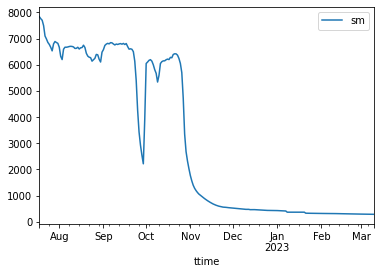

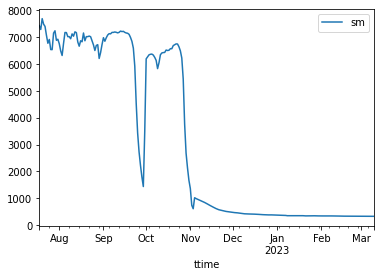

In [133]:
df1_avg.plot(y='sm',kind='line')
plt.show()
df2_avg.plot(y='sm',kind='line')
plt.show()

In [134]:
df1_avg.describe()

,pm1,pm2,pm3,am,sm,st,lum
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,1.358809,2.122035,48.881211,1.810683,3031.522160,26.968492,2507.493035
std,0.510713,1.027345,22.635938,0.941322,2936.436312,1.197173,632.526648
min,0.866522,1.183043,27.621600,0.427907,288.510638,24.756813,993.521739
25%,1.001447,1.380000,32.400000,1.203510,370.000000,26.200000,2000.000000
50%,1.172734,1.760700,40.573316,1.564676,829.597377,26.742328,2407.789130
75%,1.501429,2.384286,55.068571,2.166731,6381.305605,27.424073,2968.629100
max,3.660200,6.382941,134.185611,6.022222,7834.590000,30.181489,4122.663636


Create new data set for training with target shifted by 20 rows here target is what we are trying to predict 

In [135]:
DATASET1 = df1_avg.copy()
DATASET2 = df2_avg.copy()

In [136]:
# creating a new column targets where we predict for every next 21 days
DATASET1["targets"] = DATASET1.shift(-21)["sm"]
DATASET2["targets"] = DATASET2.shift(-21)["sm"]

.ffill to fill NaN values with previous values since we created new column target by shifting by 20 days of soil moisture inputs.

In [137]:
DATASET1 = DATASET1.ffill()

In [138]:
DATASET2 = DATASET2.ffill()


# **CREATING MARCH MONTH PREDICTION MODEL FROM USER 1**


model choosen to predict our values is RandomForestRegressor it is very powerful regressor tool it can easily handle non uniform data

In [139]:
from sklearn.ensemble import RandomForestRegressor
March_sensor1 = RandomForestRegressor(n_estimators =500 , random_state =0)

code to predict march month values

In [177]:
#splitting data set y1 is target
x1 = DATASET1.iloc[:,[1,2,3,4,5,6]].values
y1 = DATASET1.iloc[:,[7]].values
#splitting into training and testing data
x_train_1 = x1
y_train_1 = y1
#splitting at 160th column for more accurate prediction for march
x_test_1  = x1[190:]
y_test_1  = y1[190:]
#prediction starts here
March_sensor1.fit(x_train_1,y_train_1)
March_sensor1.score(x_train_1,y_train_1)
y_pred_1 = March_sensor1.predict(x_test_1)
#returns predictions in ypred
y_pred_1 = y_pred_1.reshape(-1,1)
y_test_1 = y_test_1.reshape(-1,1)
#creating dataset to compare predictions and target
df_test_1 = np.concatenate((y_test_1,y_pred_1), axis = 1)
DATA_FRAME_1 = pd.DataFrame(df_test_1,columns=['data','prediction'])

<ipython-input-177-7db08e1a4027>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  March_sensor1.fit(x_train_1,y_train_1)


In [141]:
df1_avg.corr() # returns how much each parameter is dependent on each other

,pm1,pm2,pm3,am,sm,st,lum
pm1,1.000000,0.998683,0.931962,0.346567,0.772340,-0.228034,0.532000
pm2,0.998683,1.000000,0.943116,0.353205,0.775241,-0.230008,0.540256
pm3,0.931962,0.943116,1.000000,0.353313,0.771346,-0.215968,0.559684
am,0.346567,0.353205,0.353313,1.000000,0.349466,-0.213603,0.471306
sm,0.772340,0.775241,0.771346,0.349466,1.000000,-0.179420,0.591250
st,-0.228034,-0.230008,-0.215968,-0.213603,-0.179420,1.000000,-0.330760
lum,0.532000,0.540256,0.559684,0.471306,0.591250,-0.330760,1.000000


In [142]:
print(DATA_FRAME_1) #these are predictions and given data

          data  prediction
0   312.134615  312.026085
1   309.938776  309.696707
2   308.333333  308.542541
3   307.081633  308.003402
4   306.294118  307.113251
5   305.081633  305.348808
6   304.937500  304.735287
7   304.063830  303.876015
8   303.808511  303.475356
9   303.346939  303.434601
10  301.860465  301.763853
11  301.080000  301.278088
12  299.744681  299.322485
13  298.574468  298.742685
14  297.673469  297.935917
15  296.425532  296.618549
16  295.687500  295.221920
17  294.480000  294.795009
18  293.021277  293.801350
19  292.276596  292.565415
20  291.404255  291.139485
21  290.416667  290.273456
22  289.148936  289.396587
23  288.510638  289.003286
24  288.652174  288.694197
25  288.652174  288.675731
26  288.652174  288.657967
27  288.652174  288.834746
28  288.652174  288.652174
29  288.652174  288.654854
30  288.652174  288.652174
31  288.652174  288.660104
32  288.652174  288.652174
33  288.652174  288.666672
34  288.652174  288.652174
35  288.652174  288.652174
3

checking rate of error

In [143]:
#mean squared error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(DATA_FRAME_1["data"],DATA_FRAME_1["prediction"])#returns rate error

0.17533222974829923

our error and deviation is very low this shows our model is working good


In [146]:
#creating new data frame with march month index
index = pd.date_range('2023-03-1', periods=31, freq='D')
predictions_of_march_1 = DATA_FRAME_1["prediction"][15:]
predictions_of_march_1.index = index

# **MARCH MONTH PREDICTION OF USER 1**

In [147]:
predictions_of_march_1 #these are our predictions with date index


2023-03-01    296.618549
2023-03-02    295.221920
2023-03-03    294.795009
2023-03-04    293.801350
2023-03-05    292.565415
2023-03-06    291.139485
2023-03-07    290.273456
2023-03-08    289.396587
2023-03-09    289.003286
2023-03-10    288.694197
2023-03-11    288.675731
2023-03-12    288.657967
2023-03-13    288.834746
2023-03-14    288.652174
2023-03-15    288.654854
2023-03-16    288.652174
2023-03-17    288.660104
2023-03-18    288.652174
2023-03-19    288.666672
2023-03-20    288.652174
2023-03-21    288.652174
2023-03-22    288.652174
2023-03-23    288.652174
2023-03-24    288.652174
2023-03-25    288.652174
2023-03-26    288.662761
2023-03-27    288.652174
2023-03-28    288.685753
2023-03-29    288.669240
2023-03-30    288.652174
2023-03-31    288.660104
Freq: D, Name: prediction, dtype: float64

In [148]:
#a function to get soil moisture values in march
def predict_march_s1(date_today) :
  prediction_value_of_day_s1 = predictions_of_march_1['date_today']
  return prediction_value_of_day_s1

the below graph shows our model prediction versus the given data which is very accurate

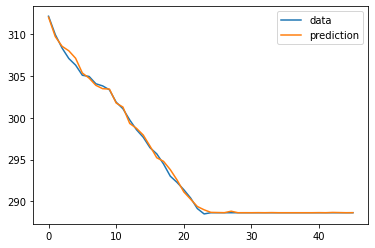

In [176]:
DATA_FRAME_1.plot(y=['data','prediction'],kind='line')
plt.show() #this plot shows our prediction vs given data in march

dumping our model using pickle so that we can run his through web app

In [150]:
pickle.dump(March_sensor1, open('model1.pkl', 'wb')) #we will run this in web app

# **CREATING MARCH MONTH PREDICTION MODEL FROM USER 2**

same prediction model and algorithm as USER 1

In [151]:
from sklearn.ensemble import RandomForestRegressor
March_sensor2 = RandomForestRegressor(n_estimators =1000 , random_state =0)

In [152]:
df2_avg.corr()

,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
pm1,1.000000,0.998543,0.933251,-0.631767,0.750509,0.507685,0.124643,0.531620,-0.676146
pm2,0.998543,1.000000,0.945752,-0.636246,0.754894,0.520493,0.128235,0.536929,-0.684222
pm3,0.933251,0.945752,1.000000,-0.638892,0.755516,0.555003,0.141894,0.540783,-0.685141
am,-0.631767,-0.636246,-0.638892,1.000000,-0.806518,-0.510217,-0.184116,-0.613373,0.635553
sm,0.750509,0.754894,0.755516,-0.806518,1.000000,0.603230,0.188521,0.670011,-0.709632
lum,0.507685,0.520493,0.555003,-0.510217,0.603230,1.000000,0.337979,0.548419,-0.575709
temp,0.124643,0.128235,0.141894,-0.184116,0.188521,0.337979,1.000000,-0.246271,-0.088362
humd,0.531620,0.536929,0.540783,-0.613373,0.670011,0.548419,-0.246271,1.000000,-0.563696
pres,-0.676146,-0.684222,-0.685141,0.635553,-0.709632,-0.575709,-0.088362,-0.563696,1.000000


In [153]:
#prediction model
x2 = DATASET2.iloc[:,[1,2,3,4,5,6,7,8]].values
y2 = DATASET2.iloc[:,[9]].values
x_train_2 = x2
y_train_2 = y2
x_test_2  = x2[190:]
y_test_2  = y2[190:]
March_sensor2.fit(x_train_2,y_train_2)
March_sensor2.score(x_train_2,y_train_2)
y_pred_2 = March_sensor2.predict(x_test_2)
y_pred_2 = y_pred_2.reshape(-1,1)
y_test_2_2 = y_test_2.reshape(-1,1)
df_test_2 = np.concatenate((y_test_2,y_pred_2), axis = 1)
DATA_FRAME_2 = pd.DataFrame(df_test_2,columns=['data','prediction'])

In [154]:
print(DATA_FRAME_2)

          data  prediction
0   335.872727  334.962712
1   333.890909  334.149808
2   332.946429  332.833853
3   332.327273  332.357785
4   332.163636  332.293723
5   332.607143  332.618929
6   332.800000  333.021318
7   333.574074  333.436666
8   333.547170  333.359203
9   333.320755  332.949825
10  332.500000  331.258209
11  331.943396  331.772904
12  331.603774  331.670503
13  331.037037  331.228841
14  330.679245  330.645654
15  330.132075  330.098907
16  330.074074  329.914032
17  329.132075  329.364132
18  328.509804  328.791081
19  328.333333  328.484500
20  328.196078  328.247854
21  327.980769  327.675391
22  327.039216  327.015432
23  327.076923  327.000617
24  326.652174  326.757952
25  326.652174  326.715531
26  326.652174  326.840942
27  326.652174  326.845949
28  326.652174  326.827199
29  326.652174  326.693596
30  326.652174  326.731936
31  326.652174  326.652174
32  326.652174  326.652174
33  326.652174  326.660292
34  326.652174  326.652174
35  326.652174  326.660292
3

In [155]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(DATA_FRAME_2["data"],DATA_FRAME_2["prediction"])#error rate

0.13753140940696704

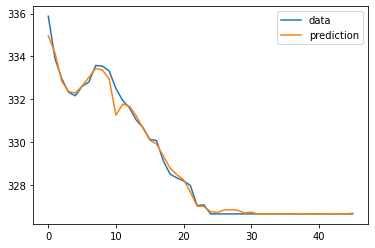

In [156]:
DATA_FRAME_2.plot(y=['data','prediction'],kind='line')
plt.show()

In [160]:
index = pd.date_range('2023-03-1', periods=31, freq='D')
predictions_of_march_2 = DATA_FRAME_2["prediction"][15:]
predictions_of_march_2.index = index

# **MARCH MONTH PREDICTIONS OF USER 2**

In [175]:
predictions_of_march_2 #these are our predictions for march

2023-03-01    330.098907
2023-03-02    329.914032
2023-03-03    329.364132
2023-03-04    328.791081
2023-03-05    328.484500
2023-03-06    328.247854
2023-03-07    327.675391
2023-03-08    327.015432
2023-03-09    327.000617
2023-03-10    326.757952
2023-03-11    326.715531
2023-03-12    326.840942
2023-03-13    326.845949
2023-03-14    326.827199
2023-03-15    326.693596
2023-03-16    326.731936
2023-03-17    326.652174
2023-03-18    326.652174
2023-03-19    326.660292
2023-03-20    326.652174
2023-03-21    326.660292
2023-03-22    326.652174
2023-03-23    326.660982
2023-03-24    326.657894
2023-03-25    326.652174
2023-03-26    326.652174
2023-03-27    326.660292
2023-03-28    326.659438
2023-03-29    326.657914
2023-03-30    326.652174
2023-03-31    326.687986
Freq: D, Name: prediction, dtype: float64

In [159]:
pickle.dump(March_sensor2, open('model2.pkl', 'wb'))

# **MODEL TO PREDICT SOIL MOISTURE FOR GIVEN PARAMETERS OF USER 1**

this model gives soil moisture at any time if you have parameters

these are just predictiors models which can predict soil moistureif give parameters

In [161]:
from sklearn.ensemble import RandomForestRegressor
input_wise_1 = RandomForestRegressor(n_estimators =100 , random_state =0)

In [162]:
x1_input = df1_avg.iloc[:,[0,1,2,3,5,6]].values
y1_output = df1_avg.iloc[:,[4]].values
x_train_in_1 = x1_input
y_train_out_1 = y1_output
x_test_in_1  = x1_input[20:]
y_test_out_1  = y1_output[20:]
input_wise_1.fit(x_train_in_1,y_train_out_1)
input_wise_1.score(x_train_in_1,y_train_out_1)
y_pred_out_1 = input_wise_1.predict(x_test_in_1)
y_pred_out_1 = y_pred_out_1.reshape(-1,1)
y_test_out_1 = y_test_out_1.reshape(-1,1)
print(y_test_out_1.shape)
print(y_pred_out_1.shape)
df_test = np.concatenate((y_test_out_1,y_pred_out_1), axis = 1)
DATA_FRAME_OUT_1 = pd.DataFrame(df_test,columns=['data','prediction'])

<ipython-input-162-aa4d4d5b5419>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  input_wise_1.fit(x_train_in_1,y_train_out_1)


(216, 1)
(216, 1)


In [163]:
print(DATA_FRAME_OUT_1)

            data   prediction
0    6677.156250  6683.780207
1    6694.366667  6685.586421
2    6702.062500  6688.655574
3    6696.288462  6686.806690
4    6678.006944  6663.282959
..           ...          ...
211   291.404255   291.110663
212   290.416667   290.700228
213   289.148936   290.562771
214   288.510638   289.813463
215   288.652174   290.845783

[216 rows x 2 columns]


In [164]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(DATA_FRAME_OUT_1["data"], DATA_FRAME_OUT_1["prediction"])

53.0227554717817

In [165]:
pickle.dump(input_wise_1, open('model3.pkl', 'wb'))

# **MODEL TO PREDICT SOIL MOISTURE FOR GIVEN INPUTS OF USER 2**

In [166]:
from sklearn.ensemble import RandomForestRegressor
input_wise_2 = RandomForestRegressor(n_estimators =200 , random_state =0)

In [167]:
x2_input = df2_avg.iloc[:,[1,2,3,5,6]].values
y2_output = df2_avg.iloc[:,[4]].values
x_train_in_2 = x2_input
y_train_out_2 = y2_output
x_test_in_2  = x2_input[20:]
y_test_out_2  = y2_output[20:]
input_wise_2.fit(x_train_in_2,y_train_out_2)
input_wise_2.score(x_train_in_2,y_train_out_2)
y_pred_out_2 = input_wise_2.predict(x_test_in_2)
y_pred_out_2 = y_pred_out_2.reshape(-1,1)
y_test_out_2 = y_test_out_2.reshape(-1,1)
print(y_test_out_2.shape)
print(y_pred_out_2.shape)
df_test = np.concatenate((y_test_out_2,y_pred_out_2), axis = 1)
DATA_FRAME_OUT_2 = pd.DataFrame(df_test,columns=['data','prediction'])

<ipython-input-167-2cdc980c40e6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  input_wise_2.fit(x_train_in_2,y_train_out_2)


(216, 1)
(216, 1)


In [168]:
print(DATA_FRAME_OUT_2)

            data   prediction
0    7024.506250  6962.722944
1    7024.829114  7018.221982
2    6947.069182  7010.098006
3    7127.662069  7074.894294
4    7042.479167  7027.002076
..           ...          ...
211   328.196078   328.315326
212   327.980769   327.812087
213   327.039216   327.381606
214   327.076923   327.532492
215   326.652174   328.754822

[216 rows x 2 columns]


In [169]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(DATA_FRAME_OUT_2["data"],DATA_FRAME_OUT_2["prediction"])

76.2450111382189

In [170]:
pickle.dump(input_wise_2, open('model4.pkl', 'wb'))

# **BACK TESTING OUR MODEL FOR ERROR CORRECTION**

In [171]:
#ignore this part

In [172]:
predictiors = df2_avg.columns[~df2_avg.columns.isin(["target"])]

In [173]:
def backtest(df_avg,model,predictors,start = 1,step = 2):
  further_preds = []
  for i in range(start,df2_avg.shape[0],step):
    train_data = df2_avg.iloc[:i,:]
    test_data  = df2_avg.iloc[i:(i+step),:]
    model.fit(train_data[predictors],train_data["target"])
    preds = model.predict(test_data[predictors])
    preds = pd.Series(preds , index=test_data.index)
    combined = pd.concat([test_data["target"],preds],axis =1)
    combined.columns = ["actual","prediction"]
    further_preds.append(combined)
  return pd.concat(further_preds)